<a href="https://colab.research.google.com/github/abood-W/ai_python/blob/main/car_prices_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
import tensorflow as tf
from sklearn.impute import SimpleImputer

In [21]:
df = pd.read_csv('/content/imports-85.data', header=None)

In [22]:
column_names = [
    "symboling", "normalized_losses", "make", "fuel_type", "aspiration",
    "num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base",
    "length", "width", "height", "curb_weight", "engine_type", "num_cylinders",
    "engine_size", "fuel_system", "bore", "stroke", "compression_ratio",
    "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"
]
df.columns = column_names
df.replace("?", np.nan, inplace=True)
num_cols = ["normalized_losses", "bore", "stroke", "horsepower", "peak_rpm", "price"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [23]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [24]:
X = df_encoded.drop("price", axis=1).values
y = df_encoded[["price"]].values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - loss: 214247904.0000 - val_loss: 293289152.0000
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 217739328.0000 - val_loss: 293245024.0000
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 227101888.0000 - val_loss: 293197280.0000
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 213431392.0000 - val_loss: 293145408.0000
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 234057952.0000 - val_loss: 293081664.0000
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 224057968.0000 - val_loss: 293003840.0000
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 200482160.0000 - val_loss: 292909760.0000
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 207071296.0000 - val_loss: 292791776.0000
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 221917968.0000 - val_loss: 292644704.0000
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 225251264.0000 - val_loss: 292474368.00

In [30]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 23208810.0000
Test Loss: 24076238.0


In [31]:
predictions = model.predict(X_test)
print(predictions[:40])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[28254.312 ]
 [18216.305 ]
 [ 2336.3909]
 [10872.78  ]
 [25606.156 ]
 [ 3670.307 ]
 [ 3984.3408]
 [ 3445.3477]
 [ 3709.6094]
 [ 5031.728 ]
 [ 9862.115 ]
 [ 3273.2214]
 [11371.4   ]
 [ 3250.6487]
 [39194.156 ]
 [ 4140.5186]
 [ 3776.927 ]
 [ 6622.948 ]
 [ 3031.4536]
 [ 4299.434 ]
 [ 3327.4548]
 [16580.55  ]
 [ 2960.4395]
 [ 6348.713 ]
 [ 4307.102 ]
 [29520.203 ]
 [10715.236 ]
 [13420.699 ]
 [ 2838.434 ]
 [15316.148 ]
 [26554.514 ]
 [ 4586.7173]
 [ 2675.2495]
 [25620.55  ]
 [ 5465.8667]
 [24652.727 ]
 [ 6288.9214]
 [ 3421.1956]
 [ 4712.7417]
 [ 6654.4175]]


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

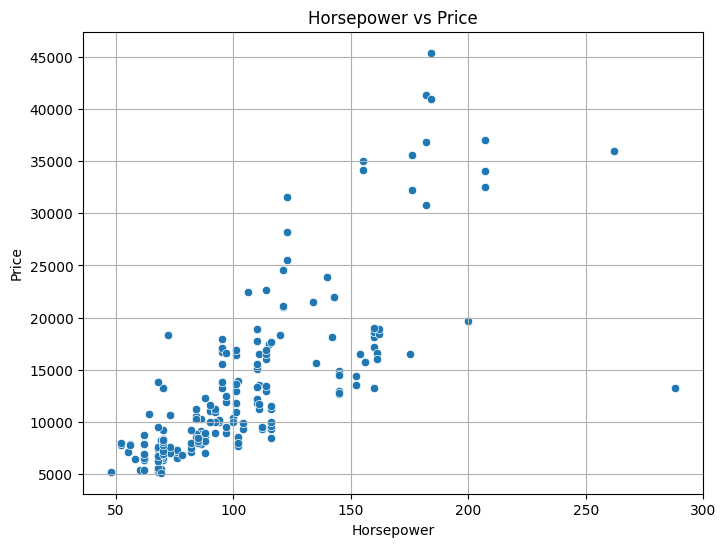

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['horsepower'], y=df['price'])
plt.title("Horsepower vs Price")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.grid(True)
plt.show()

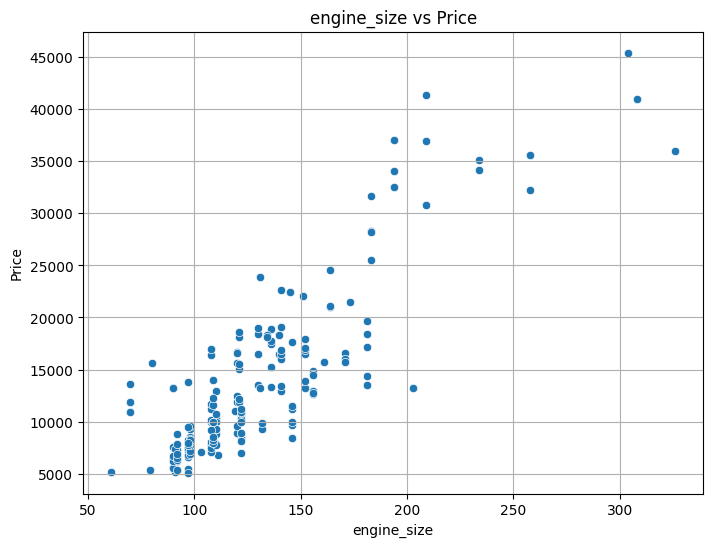

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['engine_size'], y=df['price'])
plt.title("engine_size vs Price")
plt.xlabel("engine_size")
plt.ylabel("Price")
plt.grid(True)
plt.show()

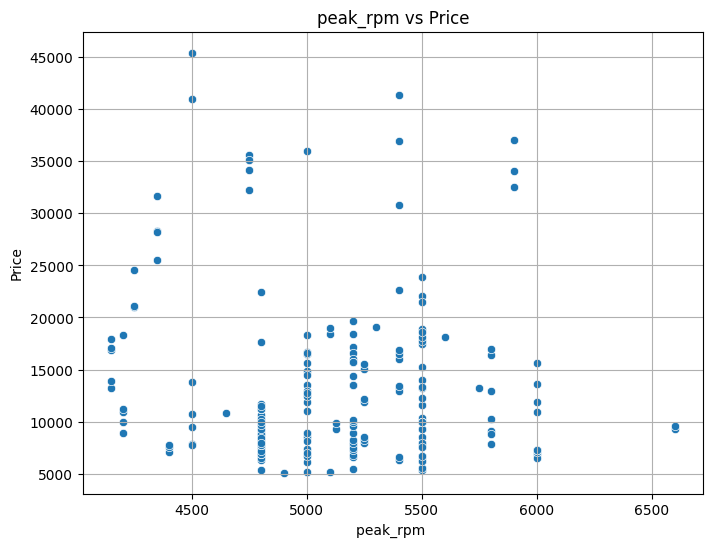

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['peak_rpm'], y=df['price'])
plt.title("peak_rpm vs Price")
plt.xlabel("peak_rpm ")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [40]:
import numpy as np

rmse = np.sqrt(loss)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 4906.75


In [48]:
print("avg price", df["price"].mean())
print("Loss percentage: ",(rmse/df["price"].mean())*100)

avg price 13207.129353233831
Loss percentage:  37.15231518646944
